# 1. Problem Framing

Business application is that the company identified a lot of wastage in the business. To reduce this we are determining when extra staff are needed and when they are not needed.

In [11]:
from IPython.display import display
from IPython.display import Image

from sklearn.externals.six import StringIO 
from subprocess import call
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from deslib.static.stacked import StackedClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split

# 2. Exploratory Data Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('H2.csv')

In [14]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## 2.1. Calculating Cost Function

In [15]:
import sklearn

In [16]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [17]:
len(df)

79330

In [18]:
df.IsCanceled.value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

# 3. Preprocessing

In [19]:
# df.hist(bins=30, figsize=(16,16))
# plt.show()

In [20]:
len(df)

79330

In [21]:
df.isna().sum().sum()

28

In [22]:
df = df.dropna()

In [23]:
df.isna().sum().sum()

0

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
len(df)

79302

In [26]:
# df.loc[df['Agent'] == '       NULL']

In [27]:
df.drop(columns=['ReservationStatusDate', 'ReservationStatus'], inplace=True)

In [28]:
len(df)

79302

In [29]:
y = df[['IsCanceled']]
X = df.drop(columns=['IsCanceled','ArrivalDateYear'])

In [30]:
num_features = ['LeadTime',
            'StaysInWeekendNights',
            'StaysInWeekNights',
            'Adults',
            'Children',
            'Babies',
            'PreviousCancellations',
            'PreviousBookingsNotCanceled',
            'BookingChanges',
            'DaysInWaitingList',
            'ADR',
            'RequiredCarParkingSpaces',
            'TotalOfSpecialRequests']

df_num = X[num_features]

df_cat = X.drop(columns=num_features)

cat_features = list(df_cat.columns)

In [31]:
len(X)

79302

In [32]:
len(y)

79302

In [33]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

In [34]:
X.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,...,Company_ 486,Company_ 489,Company_ 491,Company_ 492,Company_ 494,Company_ 497,Company_ NULL,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,6,0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,88,0,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,65,0,4,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,92,2,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
len(X)

79302

In [36]:
len(X)

79302

# 4. Modelling

## 4.0 Train-Test Split and Scaling

Logistic Regression must be scaled in advance, because the accuracy can be influenced.

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_features])

In [38]:
# Standardscaler() mean is 0, std is -+1.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                                                y, 
                                                                                test_size=0.25, 
                                                                                random_state=50)

In [39]:
# To get 1) Confusion matrix, 2) accuracy, 3) precision and 4) recall
def get_clf_eval(y_test, pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1Score = f1_score(y_test, pred)
    RocScore = roc_auc_score(y_test, pred)
    print('Confusion matrix')
    print(confusion)
    print('accuracy: {0:.4f},precison: {1:.4f}, recall: {2:.4f}, f1Score: {3:.4f}, RocScore: {0:.4f}'.format(accuracy, precision, recall, f1Score, RocScore))

# 4.1 Logistic Regession 
( L.Regression is very easy to use and it generally gived a good prediction)  
Evaluation 
1) Accuracy, 
2) Precision 
3) Recall 
4) F1_Score
5) Roc_Auc Score
6) Confusion Matrix

In [40]:
# Train and Predict using Logistic Regression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_preds)

Confusion matrix
[[9707 1826]
 [3384 4909]]
accuracy: 0.7372,precison: 0.7289, recall: 0.5919, f1Score: 0.6533, RocScore: 0.7372


In [41]:
params = {'penalty' : ['l2','l1'], 'C': [0.01,0.1,0.5,0.9]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring = 'accuracy', cv =3)
grid_clf.fit(X_scaled, y)
print('Hyper-parameter:{0}, best acuracy:{1:3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

Hyper-parameter:{'C': 0.01, 'penalty': 'l2'}, best acuracy:0.687234


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

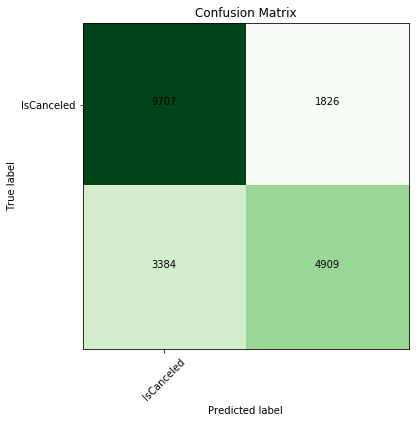

In [42]:
# CONFUSION MATRIX Visualisation  
cnf_matrix = confusion_matrix(y_test,lr_preds)
        
plt.figure(figsize=(6,6))
plt.imshow(cnf_matrix, cmap=plt.cm.Greens)
        
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],horizontalalignment='center')
plt.colorbar

In [43]:
def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict)


In [44]:
thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold: 0.4
Confusion matrix
[[7899 3634]
 [1939 6354]]
accuracy: 0.7189,precison: 0.6362, recall: 0.7662, f1Score: 0.6951, RocScore: 0.7189
threshold: 0.45
Confusion matrix
[[8949 2584]
 [2685 5608]]
accuracy: 0.7342,precison: 0.6846, recall: 0.6762, f1Score: 0.6804, RocScore: 0.7342
threshold: 0.5
Confusion matrix
[[9707 1826]
 [3384 4909]]
accuracy: 0.7372,precison: 0.7289, recall: 0.5919, f1Score: 0.6533, RocScore: 0.7372
threshold: 0.55
Confusion matrix
[[10266  1267]
 [ 4050  4243]]
accuracy: 0.7318,precison: 0.7701, recall: 0.5116, f1Score: 0.6148, RocScore: 0.7318
threshold: 0.6
Confusion matrix
[[10720   813]
 [ 4710  3583]]
accuracy: 0.7214,precison: 0.8151, recall: 0.4321, f1Score: 0.5647, RocScore: 0.7214


# 4.2 DecisionTree

In [45]:
dt_clf = DecisionTreeClassifier(random_state = 50)

In [46]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [47]:
export_graphviz(dt_clf, out_file="tree.dot", impurity = True, filled=True)

In [49]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## 4.3. Model Creation

In [86]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate

In [77]:
skf = StratifiedKFold(n_splits=2,random_state=50)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log_reg = LogisticRegression()

log_cv = cross_validate(log_reg, 
                        X_train, 
                        y_train, 
                        cv=2, 
                        scoring='roc_auc', 
                        return_train_score=True,
                        n_jobs=-1)

In [89]:
log_cv

{'fit_time': array([2.16576362, 2.28269529]),
 'score_time': array([0.19688749, 0.19588923]),
 'test_score': array([0.90470945, 0.90797883]),
 'train_score': array([0.91344648, 0.90962059])}

In [90]:
param_grid = {'penalty':['l2','l1'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

opt_model = GridSearchCV(log_reg, 
                            param_grid, 
                            cv=2, 
                            scoring='roc_auc', 
                            return_train_score=True, 
                            n_jobs=-1, 
                            verbose=False)


In [91]:
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train, X_val, y_train, y_val)
print(opt_model.best_params_)
# opt_plots(opt_model)

ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

In [ ]:
best_model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
# %%time
param_grid = {'max_depth':range(150,250+1,10),'min_samples_leaf':np.arange(30,51,3)}

opt_model = GridSearchCV(dtree_clf, 
                               param_grid, 
                               cv=skf, 
                               scoring='roc_auc', 
                               return_train_score=True, 
                               n_jobs=-1, 
                               verbose=False)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

scores(best_model,X_train, X_val, y_train, y_val)
print(opt_model.best_params_)
opt_plots(opt_model)

NameError: name 'dtree_clf' is not defined

In [43]:
roc_plot(best_model, X_train, y_train, X_val, y_val)

NameError: name 'best_model' is not defined

# Modelling Class

In [ ]:
logistic_regression = Classification('Logistic Regression', X_train, X_val, y_train, y_val)

In [ ]:
param_grid = {}
logistic_regression.get_scores(param_grid, skf)

In [ ]:
logistic_regression.pretty_conf_matrix()

In [ ]:
param_grid = {'max_depth':range(50,100,10), 'min_samples_leaf':range(38,41,1)}

decision_tree = Classification("Decision Tree", X_train, X_val, y_train, y_val)

In [ ]:
decision_tree.get_scores(param_grid, skf)

In [ ]:
decision_tree.opt_plots()

In [ ]:
param_grid = {'max_depth':[10,50,100,200,500], 'min_samples_leaf':[10,50,100,200,500]}

random_forest = Classification("Random Forest", X_train, X_val, y_train, y_val)

In [ ]:
random_forest.get_scores(param_grid, skf)

In [ ]:
random_forest.opt_plots()

In [ ]:
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification
8. Boost

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestbClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# xgboost

In [63]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    
    def plot_roc_curve(self, model, part='h1', save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

In [64]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
report = Report(X_test, y_test)
xgb = XGBClassifier().fit(X_train, y_train)
xgb_params = {
    'n_estimators': [100, 500, 1000],     
    'max_depth': [3, 5, 10],     
    'min_samples_split': [2, 5, 10]
}
params = {
    'estimator': xgb,
    'param_grid': xgb_params,
    'cv': 5,
    'refit': False,
    'n_jobs': -1,
    'verbose': 2,
    'scoring': 'recall',
}
xgb_cv = GridSearchCV(**params)
_ = xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)
xgb = XGBClassifier(**xgb_cv.best_params_).fit(X_train, y_train)
report.metrics(xgb)
report.plot_roc_curve(xgb, save=True)

NameError: name 'X_test' is not defined